In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [8]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.10066
1,0.029389,NaN,NaN,1.43430,3.12990,1.27780,NaN,0.14333,NaN,2.13180,NaN,NaN
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.63358
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.73460
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.94706
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.85140
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.75560
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.12380
398,7.293000,-0.411470,NaN,NaN,2.99900,NaN,NaN,0.27800,0.99059,NaN,1.81620,NaN


In [9]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	12
float64		column 2	30
float64		column 3	30
float64		column 4	43
float64		column 5	37
float64		column 6	18
float64		column 7	37
float64		column 8	49
float64		column 9	42
float64		column 10	42
float64		column 11	49
float64		column 12	49


In [10]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,388.000000,370.000000,370.000000,357.000000,363.000000,382.000000,363.000000,351.000000,358.000000,358.000000,351.000000,351.000000
mean,-0.131217,0.012981,2.022322,1.905960,1.952786,1.999512,2.013668,1.966669,1.932766,2.011194,2.008918,1.920109
std,2.526562,2.767313,1.135840,1.153224,1.151888,1.141728,1.176318,1.133590,1.141723,1.155483,1.150397,1.200343
min,-7.771000,-6.828400,0.005583,0.005376,0.036095,0.018503,0.003618,0.013093,0.007019,0.055837,0.006786,0.001972
25%,-0.694850,-0.874915,1.123500,0.937110,0.891820,1.041225,0.943445,1.018750,0.959895,1.013975,0.967785,0.839120
50%,-0.074609,0.001683,2.062800,1.782900,1.941200,2.053100,2.093000,1.927100,1.968100,2.064150,1.999700,1.890900
75%,0.737807,0.874713,2.955200,2.890700,2.973200,2.994975,2.973000,3.010850,2.903050,3.040025,2.982650,2.947900
max,7.293000,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.978100,3.984300,3.967600,3.996000


<AxesSubplot:>

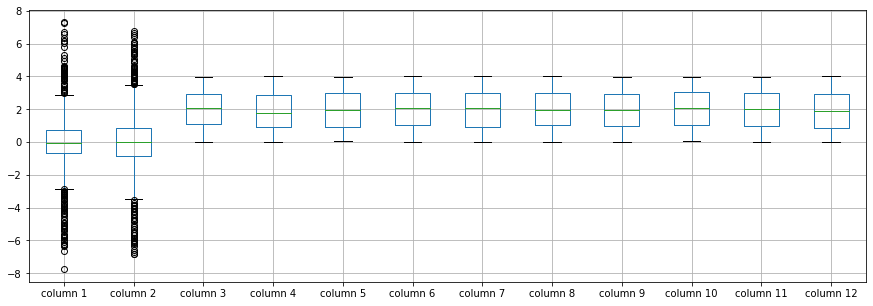

In [11]:
df.boxplot(return_type='axes', figsize=(15,5))

In [12]:
df.mean()

column 1    -0.131217
column 2     0.012981
column 3     2.022322
column 4     1.905960
column 5     1.952786
column 6     1.999512
column 7     2.013668
column 8     1.966669
column 9     1.932766
column 10    2.011194
column 11    2.008918
column 12    1.920109
dtype: float64

In [13]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.032892,-0.053725,-0.056851,-0.012097,-0.026457,-0.029725,0.038573,-0.022403,0.032021,0.101745,0.001354
column 2,0.032892,1.000000,-0.067724,0.022190,-0.080615,-0.102266,0.031308,0.009885,-0.002049,0.022867,-0.002130,0.055360
column 3,-0.053725,-0.067724,1.000000,-0.002302,0.001795,-0.073762,-0.086832,0.088219,0.092806,-0.019322,-0.054061,0.001524
column 4,-0.056851,0.022190,-0.002302,1.000000,0.009144,0.119229,-0.011301,0.105919,-0.034280,0.083386,0.003519,-0.083892
column 5,-0.012097,-0.080615,0.001795,0.009144,1.000000,0.041313,0.039488,-0.022247,0.018994,0.018386,-0.004795,-0.047133
column 6,-0.026457,-0.102266,-0.073762,0.119229,0.041313,1.000000,-0.011994,0.080212,0.035420,-0.000021,0.051322,-0.050508
column 7,-0.029725,0.031308,-0.086832,-0.011301,0.039488,-0.011994,1.000000,0.015839,0.070389,0.046802,0.005149,-0.053647
column 8,0.038573,0.009885,0.088219,0.105919,-0.022247,0.080212,0.015839,1.000000,0.036833,-0.153523,-0.079814,0.006956
column 9,-0.022403,-0.002049,0.092806,-0.034280,0.018994,0.035420,0.070389,0.036833,1.000000,0.015816,0.087622,0.054328
column 10,0.032021,0.022867,-0.019322,0.083386,0.018386,-0.000021,0.046802,-0.153523,0.015816,1.000000,0.038153,0.019960


In [14]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [15]:
imputer = md.Midas(layer_structure = [12,12+33,12+33+33,12+33+33+33,12+33+33+33+33,12+33+33+33+33+33,12+33+33+33+33+33+33,12+33+33+33+33+33,12+33+33+33+33,12+33+33+33,12+33+33,12+33,12], vae_layer = False, seed = 33)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.345437927246095
Epoch: 1 , loss: 25.24327247619629
Epoch: 2 , loss: 25.184633331298826
Epoch: 3 , loss: 25.14319450378418
Epoch: 4 , loss: 24.997879486083985
Epoch: 5 , loss: 24.5745565032959
Epoch: 6 , loss: 22.684083251953126
Epoch: 7 , loss: 21.073397521972655
Epoch: 8 , loss: 20.548622665405272
Epoch: 9 , loss: 20.25059928894043
Epoch: 10 , loss: 20.13517639160156
Epoch: 11 , loss: 19.621288452148438
Epoch: 12 , loss: 19.796979217529298
Epoch: 13 , loss: 19.348984832763673
Epoch: 14 , loss: 19.430414505004883
Epoch: 15 , loss: 19.014252166748047
Epoch: 16 , loss: 18.959759826660157
Epoch: 17 , loss: 18.661627960205077
Epoch: 18 , loss: 18.982808456420898
Epoch: 19 , loss: 18.242564506530762
Epoch: 20 , loss: 18.802909164428712
Epoch: 21 , loss: 18.137093963623048
Epoch: 22 , loss: 18.340326080322267
Epoch: 23 , loss: 17.968009872436525
Epoch: 24 , loss: 18.100418548583985
Epoch: 25 , loss: 17.92

In [16]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [17]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [18]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [19]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,-0.182738,0.313110,0.000000,0.0,0.000000,-0.627846,0.0,-0.422208,0.000000,-0.209816,-3.093542
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
396,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
397,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
398,0.0,0.000000,-2.012686,0.075771,0.0,-2.916371,-2.471685,0.0,0.000000,-2.945914,0.000000,0.376382


Calculating NRMSE Value

In [20]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [21]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [22]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(36.507946041985356, 163.27447192538312)

In [23]:
NRMS=numerator/denominator
NRMS


0.22359861655941896

In [24]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [25]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.836300,2.88660,2.469600,0.215410,3.09000,0.783430,0.510350,0.030430,0.100660
1,0.029389,0.023842,0.801720,1.434300,3.12990,1.277800,0.800654,0.14333,0.772592,2.131800,0.774914,0.750958
2,-1.115400,0.217560,1.610500,1.337100,3.76820,1.210000,3.996300,2.21730,3.902900,1.514400,2.438900,0.633580
3,-0.539160,-0.061874,0.364860,0.332780,0.19027,0.567160,1.660100,2.35270,0.661260,3.135100,3.938100,3.734600
4,-0.268400,-1.006000,2.882200,1.561600,3.20140,3.377400,1.522600,0.98475,3.109400,3.656400,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.704800,0.88269,0.354060,1.627800,3.29400,1.085000,0.157400,0.465040,2.851400
396,0.264630,-6.107600,3.905400,1.337700,1.41870,1.686100,1.095100,3.79360,0.127900,0.542490,3.365800,3.755600
397,-3.479100,-1.993300,1.324800,1.772100,2.55090,1.470100,0.925400,1.84110,3.477300,0.954960,1.526300,2.123800
398,7.293000,-0.411470,0.482114,0.472321,2.99900,0.493729,0.479915,0.27800,0.990590,0.491486,1.816200,0.463594


In [26]:
imputations[-1].to_excel("Difdoug_AG_10(imp).xlsx", index=False, header=False)